# 데이터 가져오기
https://www.kaggle.com/code/jiwonkng/tabular-playground-apr-22/data

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!cp /gdrive/MyDrive/tmp/train.csv.zip ./
!cp /gdrive/MyDrive/tmp/train_labels.csv ./
!cp /gdrive/MyDrive/tmp/test.csv.zip ./
!cp /gdrive/MyDrive/tmp/sample_submission.csv ./

In [3]:
!unzip train.csv.zip
!unzip test.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


In [4]:
!ls -al *.csv

-rw------- 1 root root     97759 Aug 12 07:00 sample_submission.csv
-rw-r--r-- 1 root root 189323249 Mar  9 14:07 test.csv
-rw-r--r-- 1 root root 401767146 Mar  9 14:07 train.csv
-rw------- 1 root root    196649 Aug 12 07:00 train_labels.csv


# 데이터 로딩

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [63]:
train_x_df = pd.read_csv("train.csv")
train_y_df = pd.read_csv("train_labels.csv")
test_df = pd.read_csv("test.csv")

In [64]:
train_x_df.head()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359


In [65]:
train_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558080 entries, 0 to 1558079
Data columns (total 16 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   sequence   1558080 non-null  int64  
 1   subject    1558080 non-null  int64  
 2   step       1558080 non-null  int64  
 3   sensor_00  1558080 non-null  float64
 4   sensor_01  1558080 non-null  float64
 5   sensor_02  1558080 non-null  float64
 6   sensor_03  1558080 non-null  float64
 7   sensor_04  1558080 non-null  float64
 8   sensor_05  1558080 non-null  float64
 9   sensor_06  1558080 non-null  float64
 10  sensor_07  1558080 non-null  float64
 11  sensor_08  1558080 non-null  float64
 12  sensor_09  1558080 non-null  float64
 13  sensor_10  1558080 non-null  float64
 14  sensor_11  1558080 non-null  float64
 15  sensor_12  1558080 non-null  float64
dtypes: float64(13), int64(3)
memory usage: 190.2 MB


In [66]:
print("data count =",1558080/60)

data count = 25968.0


In [67]:
train_y_df.head()

,sequence,state
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


In [68]:
train_y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25968 entries, 0 to 25967
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   sequence  25968 non-null  int64
 1   state     25968 non-null  int64
dtypes: int64(2)
memory usage: 405.9 KB


# 이상치 처리

sensor_00


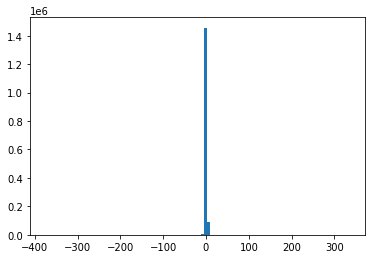

-4.1483771251932 4.400309119010819


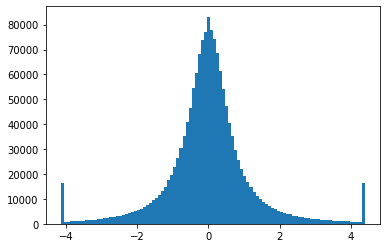

sensor_01


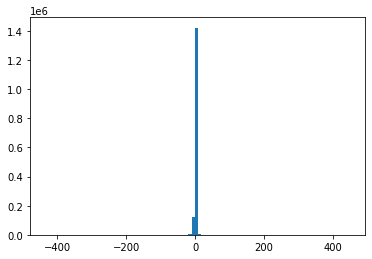

-4.853991596638656 5.20063025210084


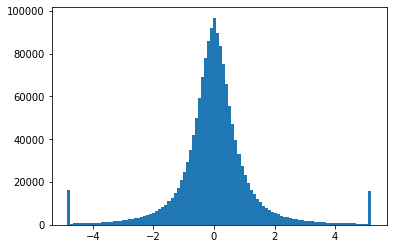

sensor_02


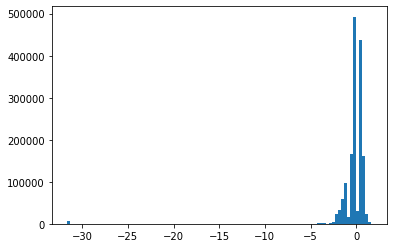

-2.6656394453004624 1.3333333333333333


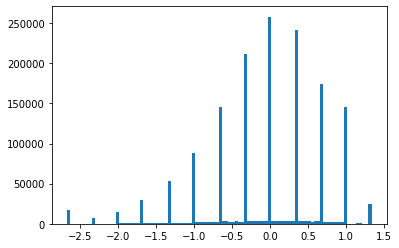

sensor_03


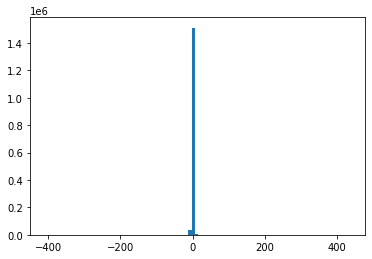

-4.347787610619468 4.460176991150442


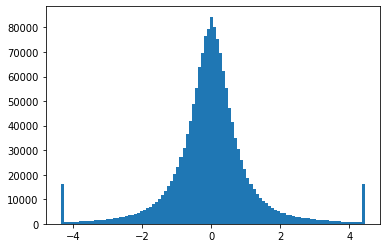

sensor_04


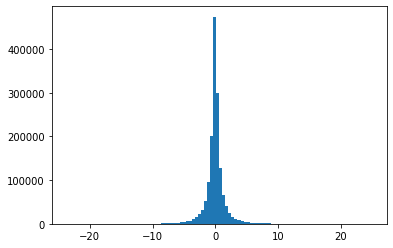

-5.265926941777833 5.297718488966463


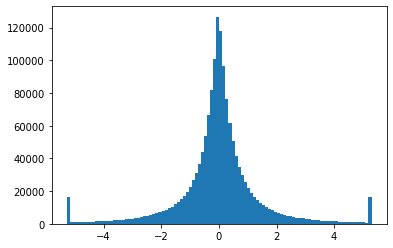

sensor_05


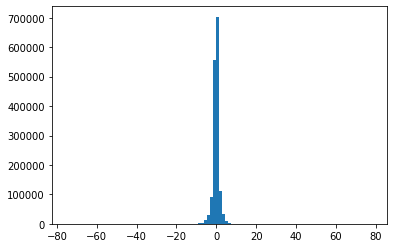

-4.792819745699326 4.424083769633508


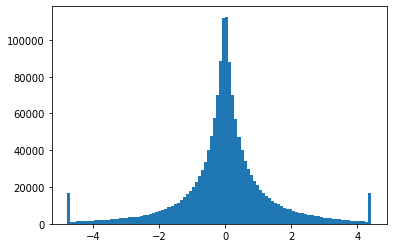

sensor_06


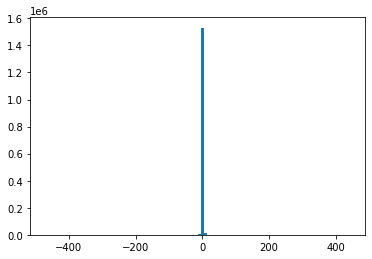

-4.151183970856102 4.311475409836066


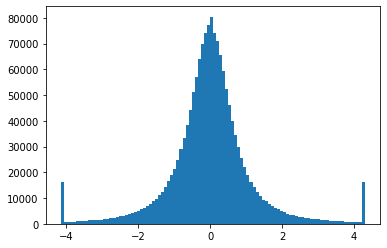

sensor_07


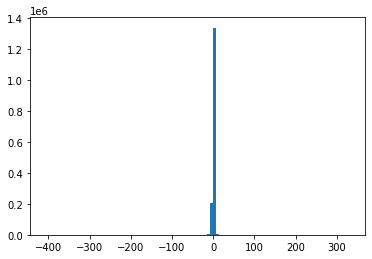

-4.352671755725191 4.605343511450381


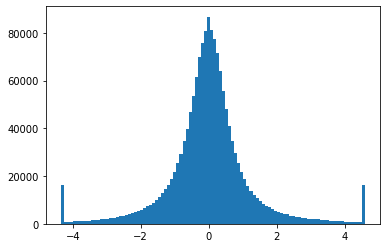

sensor_08


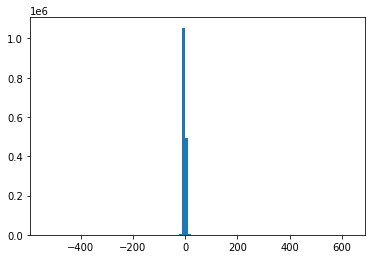

-6.1 6.1


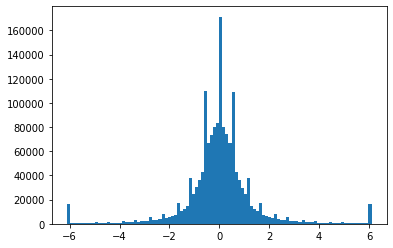

sensor_09


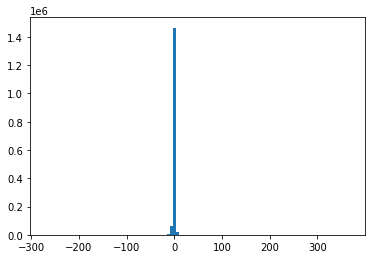

-4.9060693641618505 4.961705202312139


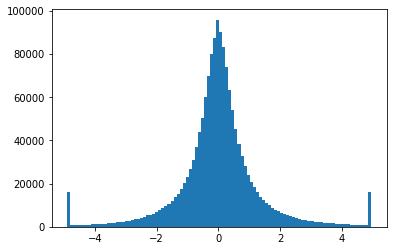

sensor_10


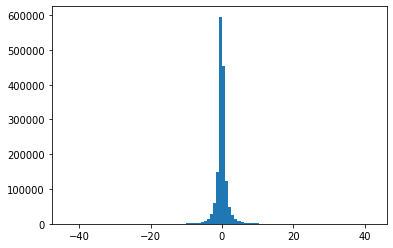

-5.566232860794795 5.550168487102021


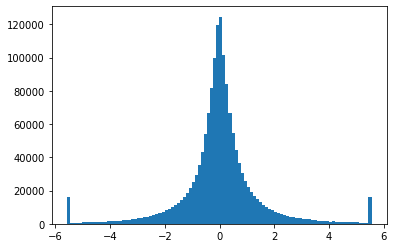

sensor_11


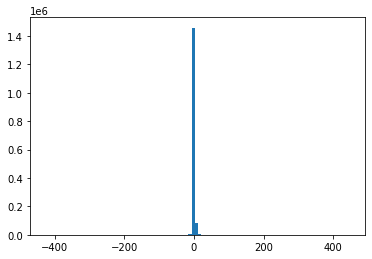

-5.069958847736626 5.228395061728396


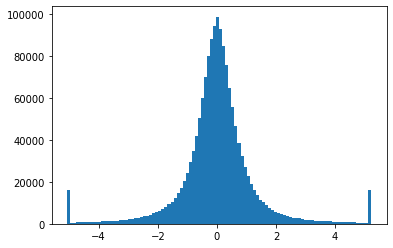

sensor_12


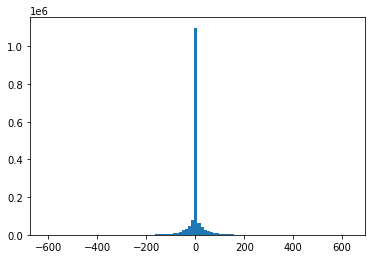

-128.3444160272805 129.8388746803069


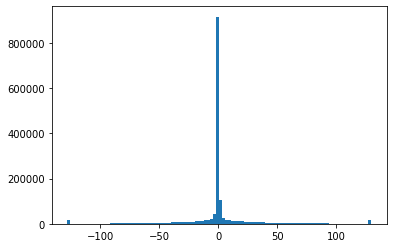

In [69]:
for feature_name in train_x_df.columns:
    if feature_name[:7] != "sensor_": continue
    print(feature_name)

    plt.hist(train_x_df[feature_name], bins=100)
    plt.show()

    low_limit = train_x_df[feature_name].quantile(q=0.01, interpolation='nearest')
    high_limit = train_x_df[feature_name].quantile(q=0.99, interpolation='nearest')
    print(low_limit, high_limit)

    train_x_df.loc[train_x_df[feature_name]<low_limit, feature_name] = low_limit
    train_x_df.loc[train_x_df[feature_name]>high_limit, feature_name] = high_limit
    test_df.loc[test_df[feature_name]<low_limit, feature_name] = low_limit
    test_df.loc[test_df[feature_name]>high_limit, feature_name] = high_limit

    plt.hist(train_x_df[feature_name], bins=100)
    plt.show()

# Normalization

In [71]:
max = train_x_df.max()
min = train_x_df.min()

train_x_df = (train_x_df - min) / (max - min)
test_df = (test_df - min) / (max - min)

# 데이터 분리

In [72]:
raw_train_x = train_x_df.to_numpy()
raw_train_y = train_y_df.to_numpy()
print(raw_train_x.shape)
print(raw_train_y.shape)

(1558080, 16)
(25968, 2)


In [73]:
DATA_COUNT = len(raw_train_y)
x = raw_train_x[:,3:].reshape((DATA_COUNT, 60, 13))
print(x.shape)

(25968, 60, 13)


In [74]:
y = raw_train_y[:,1]
print(y.shape)

(25968,)


In [75]:
i = int(len(x)*0.8)
train_x, test_x = x[:i], x[i:]
train_y, test_y = y[:i], y[i:]

In [79]:
print(train_y[:10])

[0 1 1 1 1 1 0 0 0 0]


# 모델 정의와 학습

In [76]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,2)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(Bidirectional(LSTM(128)))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 256)              145408    
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 148,000
Trainable params: 148,000
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
147/147 [==============================] - 2s 11ms/step - loss: 0.6932 - acc: 0.5035 - val_loss: 0.6929 - val_acc: 0.5149
Epoch 2/10
147/147 [==============================] - 2s 11ms/step - loss: 0.6932 - acc: 0.4968 - val_loss: 0.6930 - val_acc: 0.5149
Epoch 3/10
147/147 [==============================] - 2s 11ms/step - loss: 0.6932 - acc: 0.4947 - val_loss: 0.6931 - val_acc: 0.5149
Epoch 4/10
147/147 [==============================] - 2s 11ms/step - loss: 0.6932 - acc: 0.5010 - val_loss: 0.6932 - val_acc: 0.4851
Epoch 5/10
147/147 [==============================] - 2s 11ms/step - loss: 0.6932 - acc: 0.4906 - val_loss: 0.6932 - val_acc: 0.4851
Epoch 6/10
147/147 [==============================] - 2s 11ms/step - loss: 0.6932 - acc: 0.5003 - val_loss: 0.6931 - val_acc: 0.5149
Epoch 7/10
147/147 [==============================] - 2s 11ms/step - loss: 0.6932 - acc: 0.4972 - val_loss: 0.6931 - val_acc: 0.5149
Epoch 8/10
147/147 [==============================] - 2s 11ms/step - 

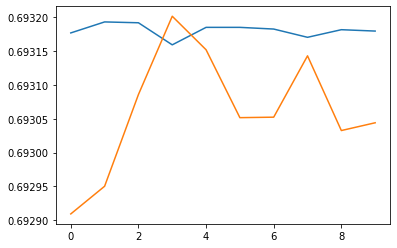

In [80]:
history = model.fit(train_x, train_y, epochs=10, verbose=1, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

163/163 [==============================] - 1s 5ms/step - loss: 0.6931 - acc: 0.5035
loss= 0.6931271553039551
acc= 0.5034655332565308


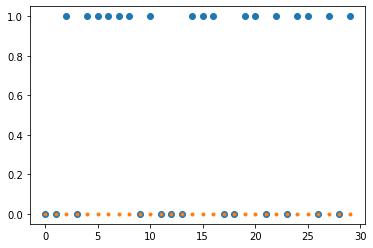

In [78]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y[:30], 'o')
plt.plot(predicted[:30], '.')
plt.show()

# submission 데이터 예측

In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733080 entries, 0 to 733079
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sequence   733080 non-null  int64  
 1   subject    733080 non-null  int64  
 2   step       733080 non-null  int64  
 3   sensor_00  733080 non-null  float64
 4   sensor_01  733080 non-null  float64
 5   sensor_02  733080 non-null  float64
 6   sensor_03  733080 non-null  float64
 7   sensor_04  733080 non-null  float64
 8   sensor_05  733080 non-null  float64
 9   sensor_06  733080 non-null  float64
 10  sensor_07  733080 non-null  float64
 11  sensor_08  733080 non-null  float64
 12  sensor_09  733080 non-null  float64
 13  sensor_10  733080 non-null  float64
 14  sensor_11  733080 non-null  float64
 15  sensor_12  733080 non-null  float64
dtypes: float64(13), int64(3)
memory usage: 89.5 MB


In [30]:
sample_submission_df = pd.read_csv("sample_submission.csv")
sample_submission_df.head()

,sequence,state
0,25968,0
1,25969,0
2,25970,0
3,25971,0
4,25972,0


In [32]:
sample_submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12218 entries, 0 to 12217
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   sequence  12218 non-null  int64
 1   state     12218 non-null  int64
dtypes: int64(2)
memory usage: 191.0 KB


In [33]:
raw_submission_x = test_df.to_numpy()
SUBMISSION_DATA_COUNT = int(len(raw_submission)/60)
print("submission data count =", SUBMISSION_DATA_COUNT)

submission data count = 12218


In [34]:
submission_x = raw_submission_x[:,3:].reshape((SUBMISSION_DATA_COUNT, 60, 13))

In [35]:
print(submission_x.shape)

(12218, 60, 13)


# 모델 예측

In [37]:
y_ = model.predict(submission_x)
predicted = np.argmax(y_, axis=-1)
print(predicted.shape)
print(predicted[:10])

(12218,)
[1 1 0 0 1 0 1 0 1 0]


In [38]:
sample_submission_df.state = predicted
sample_submission_df.head()

,sequence,state
0,25968,1
1,25969,1
2,25970,0
3,25971,0
4,25972,1


# submission.csv 파일 생성

In [42]:
sample_submission_df.to_csv("submission.csv", index=False)

In [43]:
!head submission.csv

sequence,state
25968,1
25969,1
25970,0
25971,0
25972,1
25973,0
25974,1
25975,0
25976,1
